In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/joe/Documents/boulot/git/homhots/HOTS/HOTS


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import pickle
from mix_Network import *
from Event import Event
from Tools import LoadObject, EuclidianNorm, NormalizedNorm, BattachaNorm

In [3]:
def EuclidianNorm(hist1,hist2):
    return np.linalg.norm(hist1-hist2)

def NormalizedNorm(hist1,hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return np.linalg.norm(hist1-hist2)/(np.linalg.norm(hist1)*np.linalg.norm(hist2))

def BattachaNorm(hist1, hist2):
    hist1/=np.sum(hist1)
    hist2/=np.sum(hist2)
    return -np.log(np.sum(np.sqrt(hist1*hist2)))

def accuracy(trainmap,testmap,measure):
    accuracy=0

    for i in range(len(testmap)):
        dist = np.zeros([len(trainmap)])
        for k in range(len(trainmap)):
            if measure=='bhatta':
                dist[k] = BattachaNorm(testmap[i][1],trainmap[k][1])
            elif measure=='eucli':
                dist[k] = EuclidianNorm(testmap[i][1],trainmap[k][1])
            elif measure=='norm':
                dist[k] = NormalizedNorm(testmap[i][1],trainmap[k][1])
        if testmap[i][0]==trainmap[np.argmin(dist)][0]:
            accuracy+=1
        print(symb,testmap[i][0])
    return accuracy

# 1. Initialisation of the time-surfaces (TS)
## 1.1. In Lagorce 2017, initialisation is done with the first N TS

In [4]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first', tau=0.00002)
    hots.learninglagorce()
    trainmap = hots.traininglagorce()
    testmap = hots.testinglagorce()
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)

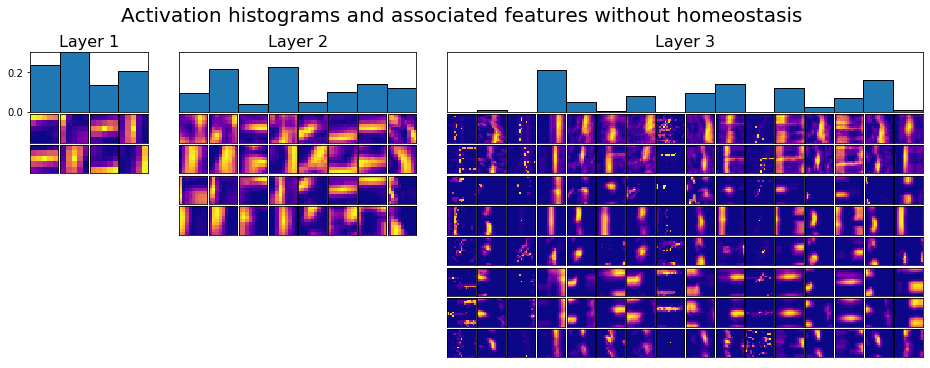

In [5]:
hots.plotlayer()

In [ ]:
score1=accuracy(trainmap,testmap,'bhatta')
score2=accuracy(trainmap,testmap,'eucli')
score3=accuracy(trainmap,testmap,'norm')
print('bhatta:'+str(score1/0.4)+'% - '+'eucli:'+str(score2/0.4)+'% - '+'norm:'+str(score3/0.4)+'%')

## 1.2. Random initialisation of the TS 

In [ ]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_randominit.pkl"
if not os.path.isfile(fname):
    hotsrdn = network(algo='lagorce', krnlinit='rdn', tau=0.00002)
    hotsrdn.learninglagorce()
    trainmaprdn = hotsrdn.traininglagorce()
    testmaprdn = hotsrdn.traininglagorce()
    with open(fname, 'wb') as file:
        pickle.dump([hotsrdn, trainmaprdn, testmaprdn], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsrdn, trainmaprdn, testmaprdn = pickle.load(file)

  0%|          | 0/223371 [00:00<?, ?it/s]

2 False True True
2 False True True
2 False True True


  0%|          | 153/223371 [00:00<03:07, 1193.15it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 189/223371 [00:00<10:29, 354.43it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 219/223371 [00:00<13:57, 266.59it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 245/223371 [00:00<22:25, 165.80it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 266/223371 [00:01<22:50, 162.82it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 285/223371 [00:01<22:06, 168.14it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 304/223371 [00:01<47:58, 77.48it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 322/223371 [00:01<40:09, 92.56it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 349/223371 [00:01<32:25, 114.61it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 382/223371 [00:01<26:09, 142.09it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 405/223371 [00:02<27:38, 134.45it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 429/223371 [00:02<24:26, 152.02it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 450/223371 [00:02<30:35, 121.44it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 467/223371 [00:02<39:28, 94.13it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 521/223371 [00:02<30:37, 121.27it/s]

2 False True True
2 False True True


  0%|          | 542/223371 [00:03<30:01, 123.71it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 561/223371 [00:03<32:41, 113.60it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 577/223371 [00:03<43:16, 85.82it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 596/223371 [00:03<36:25, 101.95it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 620/223371 [00:03<30:22, 122.25it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 655/223371 [00:03<24:46, 149.84it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 682/223371 [00:04<21:48, 170.17it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 705/223371 [00:04<25:04, 147.99it/s]

2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 725/223371 [00:04<23:07, 160.43it/s]

2 False True True
2 False True True
2 False True True
2 False True True


  0%|          | 764/223371 [00:04<19:27, 190.67it/s]

2 False True True
2 False True True
2 False True True


  0%|          | 788/223371 [00:04<21:55, 169.21it/s]

2 False True True
2 False True True
2 False True True


  0%|          | 812/223371 [00:04<20:42, 179.15it/s]

2 False True True
2 False True True


  0%|          | 835/223371 [00:04<19:21, 191.59it/s]

2 False True True
2 False True True
2 False True True


  0%|          | 868/223371 [00:04<18:34, 199.70it/s]

2 False True True
2 False True True
2 False True True


  0%|          | 890/223371 [00:05<26:47, 138.41it/s]

2 False True True
2 False True True


  0%|          | 929/223371 [00:05<21:36, 171.55it/s]

2 False True True


  0%|          | 1071/223371 [00:05<13:32, 273.77it/s]

2 False True True


  1%|          | 1146/223371 [00:05<10:57, 338.08it/s]

2 False True True
2 False True True
2 False True True


  1%|          | 1204/223371 [00:05<09:51, 375.44it/s]

2 False True True


  1%|          | 1278/223371 [00:05<08:28, 436.83it/s]

2 False True True


  1%|          | 1385/223371 [00:05<06:58, 530.73it/s]

2 False True True
2 False True True


  1%|          | 1487/223371 [00:06<05:57, 619.85it/s]

2 False True True
2 False True True
2 False True True


  1%|          | 1572/223371 [00:06<05:33, 665.43it/s]

2 False True True
2 False True True


  2%|▏         | 4815/223371 [00:07<01:39, 2197.43it/s]

2 False True True


  5%|▌         | 11451/223371 [00:10<02:15, 1562.67it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  5%|▌         | 11619/223371 [00:10<02:21, 1493.34it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False Tr

  5%|▌         | 11777/223371 [00:12<14:39, 240.67it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  5%|▌         | 11890/223371 [00:14<25:33, 137.90it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  5%|▌         | 11972/223371 [00:15<28:06, 125.33it/s]

2 False True True
2 False True True
2 False True True
2 False True True


  5%|▌         | 12032/223371 [00:15<22:50, 154.24it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


  5%|▌         | 12084/223371 [00:15<19:42, 178.61it/s]

2 False True True
2 False True True


  9%|▉         | 20445/223371 [00:20<01:28, 2285.03it/s]

2 False True True


 10%|▉         | 21967/223371 [00:21<02:20, 1436.62it/s]

2 False True True


 10%|█         | 23226/223371 [00:22<01:41, 1964.59it/s]

2 False True True


 11%|█▏        | 25288/223371 [00:23<01:52, 1758.23it/s]

2 False True True


 12%|█▏        | 25690/223371 [00:23<01:51, 1776.36it/s]

2 False True True
2 False True True
2 False True True


 12%|█▏        | 25951/223371 [00:23<01:43, 1904.57it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False Tr

 12%|█▏        | 26149/223371 [00:25<08:53, 370.00it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False Tr

 12%|█▏        | 26292/223371 [00:26<12:08, 270.42it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26397/223371 [00:27<14:59, 219.08it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26475/223371 [00:27<17:17, 189.70it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26534/223371 [00:28<19:24, 169.06it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26580/223371 [00:28<17:58, 182.41it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26619/223371 [00:28<19:42, 166.35it/s]

2 False True True
2 False True True
2 False True True


 12%|█▏        | 26650/223371 [00:28<22:45, 144.01it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26675/223371 [00:28<20:06, 163.00it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26720/223371 [00:29<16:17, 201.20it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26751/223371 [00:29<15:22, 213.04it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26793/223371 [00:29<14:04, 232.83it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26823/223371 [00:29<13:38, 240.03it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26856/223371 [00:29<12:40, 258.39it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26890/223371 [00:29<12:03, 271.61it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26920/223371 [00:29<13:28, 243.09it/s]

2 False True True
2 False True True
2 False True True


 12%|█▏        | 26947/223371 [00:29<13:33, 241.53it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 26982/223371 [00:29<12:30, 261.81it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27010/223371 [00:30<12:46, 256.32it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27037/223371 [00:30<17:03, 191.84it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27081/223371 [00:30<14:10, 230.90it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27123/223371 [00:30<12:17, 266.04it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27168/223371 [00:30<10:59, 297.65it/s]

2 False True True
2 False True True
2 False True True


 12%|█▏        | 27208/223371 [00:30<10:16, 318.05it/s]

2 False True True
2 False True True
2 False True True


 12%|█▏        | 27244/223371 [00:30<10:01, 326.17it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27298/223371 [00:30<09:04, 360.11it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27338/223371 [00:31<09:14, 353.57it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27386/223371 [00:31<08:31, 383.03it/s]

2 False True True
2 False True True


 12%|█▏        | 27456/223371 [00:31<07:22, 442.67it/s]

2 False True True


 12%|█▏        | 27530/223371 [00:31<06:29, 502.50it/s]

2 False True True
2 False True True


 12%|█▏        | 27597/223371 [00:31<06:00, 542.36it/s]

2 False True True
2 False True True


 12%|█▏        | 27678/223371 [00:31<05:25, 601.17it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 12%|█▏        | 27844/223371 [00:31<04:46, 683.43it/s]

2 False True True


 13%|█▎        | 27925/223371 [00:31<04:32, 716.67it/s]

2 False True True


 13%|█▎        | 28006/223371 [00:32<04:24, 739.00it/s]

2 False True True
2 False True True
2 False True True


 13%|█▎        | 28084/223371 [00:32<04:50, 671.50it/s]

2 False True True


 15%|█▍        | 32825/223371 [00:36<02:33, 1242.69it/s]

2 False True True


 15%|█▌        | 34156/223371 [00:37<02:06, 1497.14it/s]

2 False True True


 18%|█▊        | 39787/223371 [00:41<01:52, 1638.18it/s]

2 False True True


 19%|█▊        | 41418/223371 [00:42<01:56, 1568.53it/s]

2 False True True
2 False True True
2 False True True


 19%|█▊        | 41594/223371 [00:42<01:55, 1576.62it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False Tr

 19%|█▊        | 41752/223371 [00:43<08:14, 367.40it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 19%|█▊        | 41867/223371 [00:44<13:51, 218.20it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 19%|█▉        | 41951/223371 [00:45<14:49, 203.95it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 19%|█▉        | 42015/223371 [00:45<12:24, 243.55it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 19%|█▉        | 42073/223371 [00:45<10:43, 281.57it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 19%|█▉        | 42127/223371 [00:45<10:37, 284.41it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 19%|█▉        | 42215/223371 [00:46<10:26, 289.24it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 19%|█▉        | 42263/223371 [00:46<09:16, 325.58it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 19%|█▉        | 42305/223371 [00:46<08:42, 346.42it/s]

2 False True True
2 False True True


 19%|█▉        | 42372/223371 [00:46<07:30, 401.41it/s]

2 False True True
2 False True True
2 False True True


 19%|█▉        | 42420/223371 [00:46<07:09, 420.95it/s]

2 False True True
2 False True True
2 False True True


 19%|█▉        | 42470/223371 [00:46<06:49, 441.84it/s]

2 False True True


 19%|█▉        | 42552/223371 [00:46<05:54, 509.68it/s]

2 False True True
2 False True True


 19%|█▉        | 42715/223371 [00:47<04:46, 631.59it/s]

2 False True True


 19%|█▉        | 42911/223371 [00:47<03:55, 767.04it/s]

2 False True True


 21%|██▏       | 47478/223371 [00:51<02:37, 1116.00it/s]

2 False True True


 23%|██▎       | 52149/223371 [00:54<02:41, 1062.24it/s]

2 False True True


 25%|██▍       | 55424/223371 [00:57<02:34, 1088.98it/s]

2 False True True


 25%|██▌       | 56201/223371 [00:58<03:11, 874.49it/s] 

2 False True True
2 False True True


 25%|██▌       | 56295/223371 [00:58<03:08, 884.16it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56386/223371 [00:59<04:05, 680.62it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56463/223371 [00:59<07:49, 355.78it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56522/223371 [01:00<14:51, 187.20it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56566/223371 [01:00<18:55, 146.86it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56600/223371 [01:01<33:36, 82.69it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56625/223371 [01:02<45:22, 61.24it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56644/223371 [01:02<37:43, 73.66it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56662/223371 [01:02<34:21, 80.85it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56678/223371 [01:02<31:53, 87.13it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56692/223371 [01:03<53:49, 51.61it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56714/223371 [01:03<41:31, 66.88it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56742/223371 [01:03<32:11, 86.27it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56760/223371 [01:03<31:36, 87.84it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56778/223371 [01:03<27:27, 101.12it/s]

2 False True True
2 False True True
2 False True True


 25%|██▌       | 56794/223371 [01:04<45:56, 60.44it/s] 

2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56831/223371 [01:04<34:24, 80.67it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56862/223371 [01:04<26:50, 103.42it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56901/223371 [01:04<21:04, 131.70it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 25%|██▌       | 56928/223371 [01:04<18:12, 152.30it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 26%|██▌       | 56982/223371 [01:04<14:28, 191.53it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 26%|██▌       | 57023/223371 [01:04<12:10, 227.82it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57088/223371 [01:04<09:54, 279.50it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 26%|██▌       | 57131/223371 [01:05<18:23, 150.70it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57200/223371 [01:05<16:28, 168.18it/s]

2 False True True


 26%|██▌       | 57229/223371 [01:06<16:32, 167.37it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 26%|██▌       | 57269/223371 [01:06<13:39, 202.57it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57334/223371 [01:06<10:51, 254.78it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57381/223371 [01:06<09:23, 294.60it/s]

2 False True True
2 False True True


 26%|██▌       | 57433/223371 [01:06<08:17, 333.38it/s]

2 False True True


 26%|██▌       | 57477/223371 [01:06<08:20, 331.52it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57518/223371 [01:06<08:30, 324.60it/s]

2 False True True
2 False True True


 26%|██▌       | 57569/223371 [01:06<07:35, 363.90it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57611/223371 [01:06<07:33, 365.12it/s]

2 False True True
2 False True True


 26%|██▌       | 57663/223371 [01:07<06:54, 400.01it/s]

2 False True True
2 False True True


 26%|██▌       | 57721/223371 [01:07<06:15, 440.83it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57769/223371 [01:07<06:09, 448.36it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57817/223371 [01:07<06:16, 439.23it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 57868/223371 [01:07<06:01, 458.22it/s]

2 False True True
2 False True True


 26%|██▌       | 57916/223371 [01:07<07:30, 367.65it/s]

2 False True True


 26%|██▌       | 57971/223371 [01:07<06:45, 407.95it/s]

2 False True True
2 False True True


 26%|██▌       | 58016/223371 [01:07<06:34, 419.40it/s]

2 False True True
2 False True True


 26%|██▌       | 58061/223371 [01:07<06:33, 420.53it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 58106/223371 [01:08<07:06, 387.93it/s]

2 False True True
2 False True True


 26%|██▌       | 58147/223371 [01:08<07:32, 365.16it/s]

2 False True True
2 False True True


 26%|██▌       | 58222/223371 [01:08<06:27, 426.47it/s]

2 False True True
2 False True True


 26%|██▌       | 58270/223371 [01:08<06:41, 411.48it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 58315/223371 [01:08<06:31, 421.83it/s]

2 False True True


 26%|██▌       | 58369/223371 [01:08<06:06, 450.76it/s]

2 False True True


 26%|██▌       | 58450/223371 [01:08<05:17, 519.45it/s]

2 False True True


 26%|██▌       | 58508/223371 [01:08<05:14, 524.24it/s]

2 False True True
2 False True True
2 False True True


 26%|██▌       | 58567/223371 [01:09<05:13, 525.70it/s]

2 False True True
2 False True True


 26%|██▋       | 58705/223371 [01:09<04:40, 587.75it/s]

2 False True True
2 False True True


 26%|██▋       | 58842/223371 [01:09<04:34, 600.17it/s]

2 False True True


 28%|██▊       | 63569/223371 [01:16<03:19, 799.73it/s] 

2 False True True


 33%|███▎      | 74403/223371 [01:24<01:35, 1554.78it/s]

2 False True True
2 False True True


 33%|███▎      | 74590/223371 [01:24<01:30, 1637.04it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False Tr

 33%|███▎      | 74757/223371 [01:25<06:27, 383.26it/s] 

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 74878/223371 [01:26<09:34, 258.27it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 74967/223371 [01:27<13:21, 185.12it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75033/223371 [01:27<15:37, 158.18it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75083/223371 [01:28<14:26, 171.19it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75124/223371 [01:28<15:09, 162.93it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75158/223371 [01:28<19:40, 125.50it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75186/223371 [01:28<16:40, 148.06it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75230/223371 [01:29<13:27, 183.36it/s]

2 False True True
2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75270/223371 [01:29<11:28, 215.06it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75325/223371 [01:29<09:38, 255.92it/s]

2 False True True
2 False True True
2 False True True
2 False True True


 34%|███▎      | 75362/223371 [01:29<08:57, 275.52it/s]

2 False True True
2 False True True


 34%|███▍      | 75487/223371 [01:29<07:18, 337.52it/s]

2 False True True


 34%|███▍      | 75627/223371 [01:29<05:57, 412.86it/s]

2 False True True
2 False True True
2 False True True


 34%|███▍      | 75681/223371 [01:30<08:10, 300.88it/s]

2 False True True


 34%|███▍      | 75779/223371 [01:30<06:28, 379.82it/s]

2 False True True


 34%|███▍      | 75872/223371 [01:30<05:19, 461.10it/s]

2 False True True


 34%|███▍      | 75942/223371 [01:30<05:31, 444.51it/s]

2 False True True
2 False True True
2 False True True


 34%|███▍      | 76003/223371 [01:30<05:22, 456.75it/s]

2 False True True
2 False True True


 34%|███▍      | 76077/223371 [01:30<04:45, 515.35it/s]

2 False True True


 35%|███▌      | 79177/223371 [01:35<02:25, 992.55it/s]

2 False True True


 36%|███▋      | 81384/223371 [01:36<01:42, 1380.52it/s]

In [ ]:
hotsrdn.plotlayer()

In [ ]:
score1=accuracy(trainmaprdn,testmaprdn,'bhatta')
score2=accuracy(trainmaprdn,testmaprdn,'eucli')
score3=accuracy(trainmaprdn,testmaprdn,'norm')
print('bhatta:'+str(score1/0.4)+'% - '+'eucli:'+str(score2/0.4)+'% - '+'norm:'+str(score3/0.4)+'%')

# 2. Filtering
## 2.1 Filtering only the TS on the first layer of the network

In [ ]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation.pkl"
if not os.path.isfile(fname):
    hots = network(algo='lagorce', krnlinit='first', tau=0.00002)
    hots.learninglagorce()
    with open(fname, 'wb') as file:
        pickle.dump(hots, file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots = pickle.load(file)
hots.plotlayer()

## 2.2 Filtering TS on every layer

In [ ]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_filterall.pkl"
if not os.path.isfile(fname):
    hotsfilt = network(algo='lagorce', krnlinit='first', tau=0.00002)
    hotsfilt.learninglagorce(filtering='all')
    trainmapfilt = hotsfilt.traininglagorce()
    testmapfilt = hotsfilt.traininglagorce()
    with open(fname, 'wb') as file:
        pickle.dump([hotsfilt, trainmapfilt, testmapfilt], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfilt, trainmapfilt, testmapfilt = pickle.load(file)
hotsfilt.plotlayer()

In [ ]:
score1=accuracy(trainmapfilt,testmapfilt,'bhatta')
score2=accuracy(trainmapfilt,testmapfilt,'eucli')
score3=accuracy(trainmapfilt,testmapfilt,'norm')
print('bhatta:'+str(score1/0.4)+'% - '+'eucli:'+str(score2/0.4)+'% - '+'norm:'+str(score3/0.4)+'%')

## 2.3. Applying stronger filter (2*R -> 5*R)

In [ ]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-mix_hots_validation_filtx5.pkl"
if not os.path.isfile(fname):
    hotsfiltx5 = network(algo='lagorce', krnlinit='first', tau=0.00002, filt=5)
    hotsfiltx5.learninglagorce(filtering='all')
    trainmapfiltx5 = hotsfiltx5.traininglagorce()
    testmapfiltx5 = hotsfiltx5.traininglagorce()
    with open(fname, 'wb') as file:
        pickle.dump([hotsfiltx5, trainmapfiltx5, testmapfiltx5] , file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hotsfiltx5, trainmapfiltx5, testmapfiltx5 = pickle.load(file)
hotsfiltx5.plotlayer()

In [ ]:
score1=accuracy(trainmapfiltx5,testmapfiltx5,'bhatta')
score2=accuracy(trainmapfiltx5,testmapfiltx5,'eucli')
score3=accuracy(trainmapfiltx5,testmapfiltx5,'norm')
print('bhatta:'+str(score1/0.4)+'% - '+'eucli:'+str(score2/0.4)+'% - '+'norm:'+str(score3/0.4)+'%')